In [15]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [16]:
class bmiState(TypedDict):
    height: float
    weight: float
    bmi: float
    category: str

In [17]:
def bmical(state:bmiState) -> bmiState:
    weight = state["weight"]
    height = state["height"]
    bmi = weight / (height ** 2)
    state["bmi"] = bmi
    return state

In [18]:
def categorize_bmi(state:bmiState) -> bmiState:
    bmi = state["bmi"]
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    state["category"] = category
    return state

In [19]:
graph = StateGraph(bmiState)
graph.add_node("bmi",bmical)
graph.add_node("category",categorize_bmi)


graph.add_edge(START,"bmi")
graph.add_edge("bmi","category")
graph.add_edge("category",END)

workflow = graph.compile()
initial_state = {"height":1.75,"weight":70}

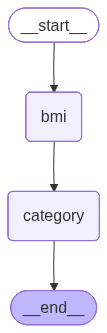

In [25]:
from IPython.display import Image, display


display(Image(workflow.get_graph().draw_mermaid_png()))

In [26]:
workflow.invoke(initial_state)

{'height': 1.75,
 'weight': 70,
 'bmi': 22.857142857142858,
 'category': 'Normal weight'}